(481, 707)
(481, 707)


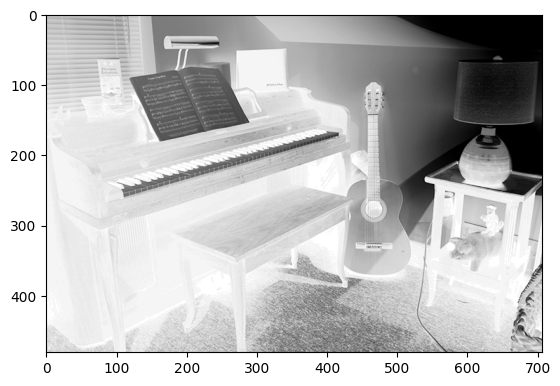

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


imgL = cv2.imread('/content/im0.png', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('/content/im1.png', cv2.IMREAD_GRAYSCALE)

print(imgL.shape)
print(imgR.shape)

plt.imshow(imgL, cmap='Greys')
plt.show()

In [17]:
stereo = cv2.StereoBM_create(numDisparities=32, blockSize=33) #numDisparities should always be a multiple of 16, blockSize should always be an odd number

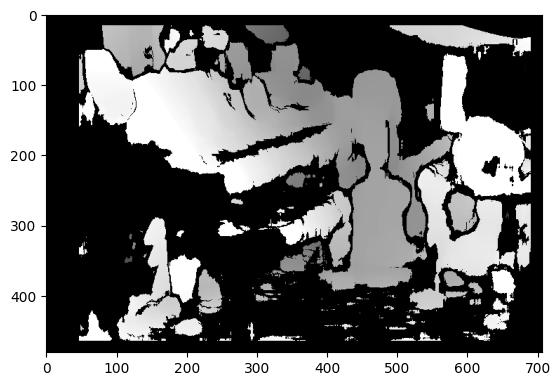

In [18]:
# Compute disparity
disparity = stereo.compute(imgL, imgR)

# Display disparity map
plt.imshow(disparity, 'gray')
plt.show()

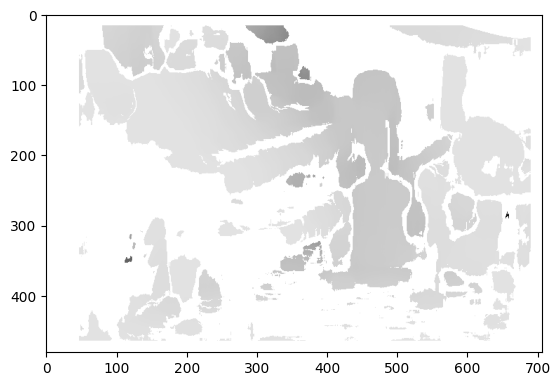

In [19]:
baseline = 0.1
focal_length = 0.8

depth_map = np.zeros_like(disparity, dtype = np.float32)
depth_map[disparity>0] = focal_length * baseline / disparity[disparity>0]

min_depth = depth_map.min()
max_depth = depth_map.max()
depth_map = (depth_map - min_depth) / (max_depth - min_depth)

plt.imshow(depth_map,cmap = 'Greys')